In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cd=pd.read_csv(r"C:\Users\VIRAJ KAMAT\Desktop\Data Science\Assignments\Clustering\crime_data.csv")
cd.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
cd=cd.rename({'Unnamed: 0':'city'},axis=1)
cd.head()

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


There is no any null value and all data types also valid

Normalizing data

In [5]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [6]:
cd_norm=norm_func(cd.iloc[:,1:])
cd_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# Performing Hierarchical Clustering

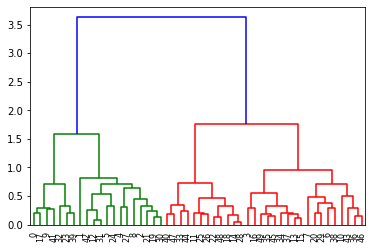

In [7]:
dendogram= sch.dendrogram(sch.linkage(cd_norm, method='ward'))

In [8]:
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(cd_norm)
md=pd.Series(y_hc)
cd['cluster_hc']=md
cd.head()

,city,Murder,Assault,UrbanPop,Rape,cluster_hc
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [9]:
cd['cluster_hc'].value_counts()

0    20
1    18
2    12
Name: cluster_hc, dtype: int64

In [10]:
cd.groupby(['cluster_hc']).mean()

,Murder,Assault,UrbanPop,Rape
cluster_hc,,,,
0,12.165000,255.250000,68.400000,29.165000
1,6.055556,140.055556,71.333333,18.683333
2,3.091667,76.000000,52.083333,11.833333


## Performing KMeans Clustering

Elbow graph to calculate value of k

Text(0, 0.5, 'wcss')

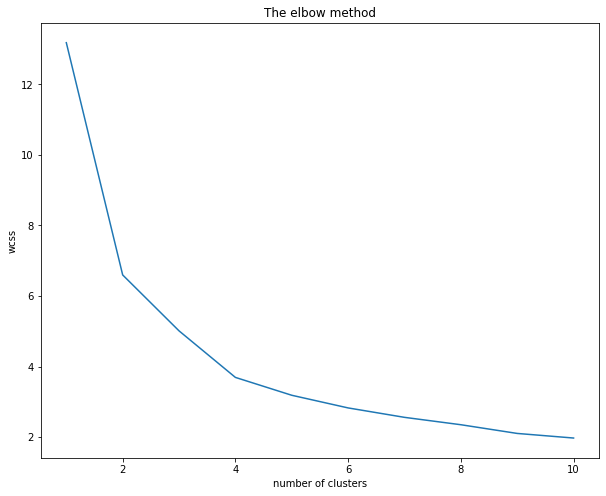

In [11]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=7)
    kmeans.fit(cd_norm)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')

from graph we can say that value of k should be 4

In [12]:
model=KMeans(n_clusters=4)
model.fit(cd_norm)
model.labels_

array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
       1, 3, 2, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2])

In [13]:
clust=pd.Series(model.labels_)
cd['Clusters_kmeans']=clust
cd.head()

,city,Murder,Assault,UrbanPop,Rape,cluster_hc,Clusters_kmeans
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,0,0
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,1,3
4,California,9.0,276,91,40.6,0,0


In [14]:
cd.drop('cluster_hc',axis=1).groupby(['Clusters_kmeans']).mean()

,Murder,Assault,UrbanPop,Rape
Clusters_kmeans,,,,
0,10.966667,264.000000,76.500000,33.608333
1,3.600000,78.538462,52.076923,12.176923
2,5.852941,141.176471,73.647059,19.335294
3,13.937500,243.625000,53.750000,21.412500


In [15]:
cd['Clusters_kmeans'].value_counts()

2    17
1    13
0    12
3     8
Name: Clusters_kmeans, dtype: int64

areas in Cluster 1  are red zone areas.highest crimes are happen in cluster 4 areas.all the rates(murder rate,assault rate and rape rate) are higher in that areas.
areas in cluster 4 also having all the crime rates higher.we can put these areas also in red zone.
areas in cluster 3 having moderate crime rates.
and areas in clutser 2 having very less crime rates.

## Visualization of Urban Population and crime rates

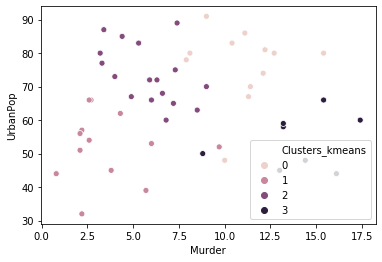

In [16]:
sns.scatterplot(x=cd['Murder'],y=cd['UrbanPop'],data=cd,hue='Clusters_kmeans')

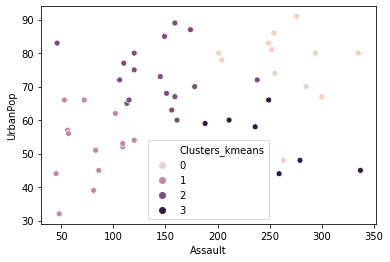

In [17]:
sns.scatterplot(x=cd['Assault'],y=cd['UrbanPop'],data=cd,hue='Clusters_kmeans')

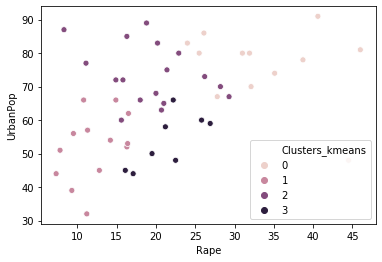

In [18]:
sns.scatterplot(x=cd['Rape'],y=cd['UrbanPop'],data=cd,hue='Clusters_kmeans')

## Performing DBSCAN Clustering

In [19]:
dbmodel=DBSCAN(eps=0.3,min_samples=5)
dbmodel.fit(cd_norm)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [20]:
db=dbmodel.labels_
cd['clusters_db']=db
cd.head()

,city,Murder,Assault,UrbanPop,Rape,cluster_hc,Clusters_kmeans,clusters_db
0,Alabama,13.2,236,58,21.2,0,3,0
1,Alaska,10.0,263,48,44.5,0,0,-1
2,Arizona,8.1,294,80,31.0,0,0,-1
3,Arkansas,8.8,190,50,19.5,1,3,1
4,California,9.0,276,91,40.6,0,0,-1


In [21]:
cd2=cd.drop(['cluster_hc','Clusters_kmeans'],axis=1)

In [22]:
cd2.groupby(['clusters_db']).mean()

,Murder,Assault,UrbanPop,Rape
clusters_db,,,,
-1,10.992857,271.500000,71.357143,30.485714
0,14.720000,232.600000,58.200000,23.720000
1,5.222581,115.290323,64.096774,16.651613


In [23]:
cd2['clusters_db'].value_counts()

 1    31
-1    14
 0     5
Name: clusters_db, dtype: int64

14 areas are outliers